In [3]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

from datetime import datetime

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import altair as alt
from vega_datasets import data
alt.data_transformers.enable('json')

import warnings     
warnings.filterwarnings("ignore")

In [4]:
# Load 100+ Sampled Train Dataset

Train=pd.read_csv("Datasets/health/train_labels.csv", encoding='UTF-8')
Train_Beneficiarydata=pd.read_csv("Datasets/health/train_beni_sample.csv", encoding='UTF-8')
Train_Inpatientdata=pd.read_csv("Datasets/health/train_inpatient_sample.csv", encoding='UTF-8')
Train_Outpatientdata=pd.read_csv("Datasets/health/train_outpatient_sample.csv", encoding='UTF-8')

state_number = pd.read_csv("Datasets/States/state_number.csv", encoding='UTF-8')


# # Load Train Dataset

# Train=pd.read_csv("Datasets/health/train_labels.csv", encoding='UTF-8')
# Train_Beneficiarydata=pd.read_csv("Datasets/health/train_beni.csv", encoding='UTF-8')
# Train_Inpatientdata=pd.read_csv("Datasets/health/train_inpatient.csv", encoding='UTF-8')
# Train_Outpatientdata=pd.read_csv("Datasets/health/train_outpatient.csv", encoding='UTF-8')

# state_number = pd.read_csv("Datasets/States/state_number.csv", encoding='UTF-8')

In [5]:
Train_Beneficiarydata.head()

,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,BENE11001,1943-01-01,NaN,1,1,0,39,230,12,12,1,2,1,2,2,1,1,1,2,1,1,36000,3204,60,70
1,BENE11002,1936-09-01,NaN,2,1,0,39,280,12,12,2,2,2,2,2,2,2,2,2,2,2,0,0,30,50
2,BENE11003,1936-08-01,NaN,1,1,0,52,590,12,12,1,2,2,2,2,2,2,1,2,2,2,0,0,90,40
3,BENE11004,1922-07-01,NaN,1,1,0,39,270,12,12,1,1,2,2,2,2,1,1,1,1,2,0,0,1810,760
4,BENE11005,1935-09-01,NaN,1,1,0,24,680,12,12,2,2,2,2,1,2,1,2,2,2,2,0,0,1790,1200


In [6]:
Train_Inpatientdata.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DischargeDt,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,7866,1068.0,2009-04-18,201,1970,4019,5853,7843,2768,71590,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,6186,1068.0,2009-09-02,750,6186,2948,56400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7092.0,NaN,NaN,NaN,NaN,NaN
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,2009-09-17,29590,1068.0,2009-09-20,883,29623,30390,71690,34590,V1581,32723,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,431,1068.0,2009-02-22,067,43491,2762,7843,32723,V1041,4254,25062,40390,4019,NaN,331.0,NaN,NaN,NaN,NaN,NaN
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,NaN,2009-08-13,78321,1068.0,2009-08-30,975,042,3051,34400,5856,42732,486,5119,29620,20300,NaN,3893.0,NaN,NaN,NaN,NaN,NaN


#### 1. merging data

In [3]:
# merge 4 main datasets in order to create one "total" dataset.

tmp = pd.merge(Train_Outpatientdata, Train, how='left', on = 'Provider')
train_total = pd.merge(tmp, Train_Beneficiarydata, how = 'left', on = 'BeneID')
train_total = pd.merge(train_total, state_number, how = 'left', on='State')

print(train_total.shape)
train_total.head()

(517737, 55)


,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode,PotentialFraud,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,state_name,state_code,state_id_ansi
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,NaN,NaN,78943,V5866,V1272,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,56409,Yes,1936-09-01,NaN,2,1,0,39,280,12,12,2,2,2,2,2,2,2,2,2,2,2,0,0,30,50,Pennsylvania,PA,42
1,BENE11003,CLM189947,2009-02-12,2009-02-12,PRV57610,80,PHY362868,NaN,NaN,6115,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,79380,No,1936-08-01,NaN,1,1,0,52,590,12,12,1,2,2,2,2,2,2,1,2,2,2,0,0,90,40,Wisconsin,WI,55
2,BENE11003,CLM438021,2009-06-27,2009-06-27,PRV57595,10,PHY328821,NaN,NaN,2723,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,No,1936-08-01,NaN,1,1,0,52,590,12,12,1,2,2,2,2,2,2,1,2,2,2,0,0,90,40,Wisconsin,WI,55
3,BENE11004,CLM121801,2009-01-06,2009-01-06,PRV56011,40,PHY334319,NaN,NaN,71988,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,Yes,1922-07-01,NaN,1,1,0,39,270,12,12,1,1,2,2,2,2,1,1,1,1,2,0,0,1810,760,Pennsylvania,PA,42
4,BENE11004,CLM150998,2009-01-22,2009-01-22,PRV56011,200,PHY403831,NaN,NaN,82382,30000,72887,4280,7197,V4577,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,71947,Yes,1922-07-01,NaN,1,1,0,39,270,12,12,1,1,2,2,2,2,1,1,1,1,2,0,0,1810,760,Pennsylvania,PA,42


#### 2. Categorize columns for better understanding

In [4]:
# These are the 3 columns that are only in inpatient data. 
# So these have to be eliminated in preprocessing outpatient data
list(set(Train_Inpatientdata.columns) - set(Train_Outpatientdata.columns))


['DiagnosisGroupCode', 'AdmissionDt', 'DischargeDt']

In [5]:
### 1. Diagnosis code : various diagnosis for each claims. 
# if the claim only has 2~3 diagnosis, the rest is null
# dtypes : string
diagnosis_columns = [ 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3',
       'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6',
       'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9',
       'ClmDiagnosisCode_10']



### 2. Procedure code : various procedurea for each claims. 
# if the claim only has 2~3 procedures, the rest is null
# dtypes : float
procedure_columns = [ 'ClmProcedureCode_1', 'ClmProcedureCode_2',
       'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5',
       'ClmProcedureCode_6']

# change the procedure columns to string
for column in procedure_columns:
    train_total[column] = train_total[column].fillna(0).astype(int) # change NaN to 0
    train_total[column] = train_total[column].astype('str') # it's float originally
    

        
    
### 3. date related columns
date_columns = ['ClaimStartDt', 'ClaimEndDt', 'DOB', 'DOD']
# DOD is NaN when the patient is dead after the admision or discharge.

# change date related columns to datetime dtypes
for column in date_columns:
    train_total[column] = pd.to_datetime(train_total[column], errors='ignore')
    
    

### 4. two new columns are created based on the date related columns

# 4-1. Age is calculated from DOB and ClaimStart date.
train_total['Age'] = train_total['ClaimStartDt'].dt.year - train_total['DOB'].dt.year
# 4-2. Claim period is calculated and made into a new column
train_total['ClaimPeriod'] = (train_total['ClaimEndDt'] - train_total['ClaimStartDt']).dt.days

time_columns = ['Age', 'ClaimPeriod']



    
### 5. Beneficiary's chronic disease status
# each column means whether the beneficiary(=patient) has the disease
chronic_disease_columns = ['RenalDiseaseIndicator', 'ChronicCond_Alzheimer',
       'ChronicCond_Heartfailure', 'ChronicCond_KidneyDisease',
       'ChronicCond_Cancer', 'ChronicCond_ObstrPulmonary',
       'ChronicCond_Depression', 'ChronicCond_Diabetes',
       'ChronicCond_IschemicHeart', 'ChronicCond_Osteoporasis',
       'ChronicCond_rheumatoidarthritis', 'ChronicCond_stroke']

# For example, RenalDiseaseIndicator means the patient(beneficiary) has a kidney disease


### 6. amount columns 
# these are the amount of money related to the claims
# for example, DeductibleAmtPaid is the amount the patient has to pay before the insurance company
# makes the payment. In medicare inpatient, it is 1068. So the patient pays up to 1068 USD, and 
# above that, Medicare pays for it

amount_columns = ['InscClaimAmtReimbursed', 'DeductibleAmtPaid', 'IPAnnualReimbursementAmt', 'IPAnnualDeductibleAmt',
       'OPAnnualReimbursementAmt', 'OPAnnualDeductibleAmt' ]

##### 2-1.  Data manipulation of various features

exploring and comparing various columns between fraudulent and non-fraudulent

count    0.576818
mean     1.002864
std      0.998780
min      1.040000
25%      1.014925
50%      1.000000
75%      1.000000
max      1.000000
Name: Age, dtype: float64


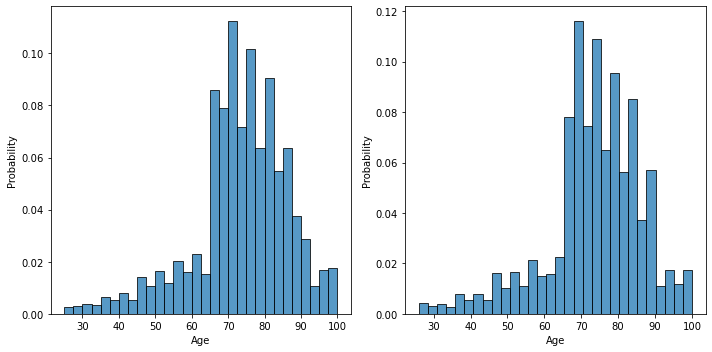

In [6]:
# 2-1-1. age 
# There is no meaningful difference of age distribution bewtween fraudulent
# and non-fraudulent group

# distribution of fraudulent group / non-fraudulent group
print(train_total.loc[train_total['PotentialFraud'] == 'Yes', 'Age'].describe() / train_total.loc[train_total['PotentialFraud'] == 'No', 'Age'].describe())

# visualization of distribution 
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))

sns.histplot(train_total[train_total['PotentialFraud'] == 'No'], x='Age', bins=30, ax=axes[0,], stat = 'probability')
sns.histplot(train_total[train_total['PotentialFraud'] == 'Yes'], x='Age', bins=30, ax=axes[1,], stat = 'probability')

fig.tight_layout()

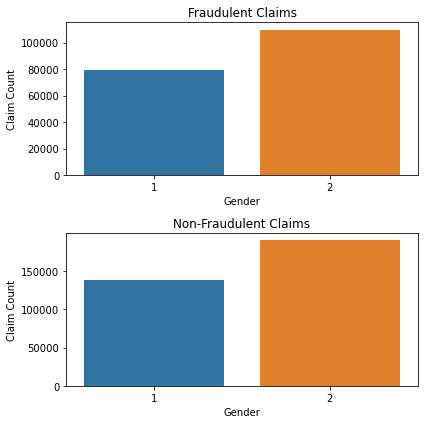

In [7]:
# 2-1-2. Gender
# There is no meaningful difference of gender distribution between fraudulent
# and non-fraudulent group

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(6,6))

ax0 = sns.countplot(data=train_total[train_total['PotentialFraud'] == 'Yes'], x="Gender", ax=axes[0,])
ax0.set_title('Fraudulent Claims')
ax0.set_ylabel('Claim Count')

ax1 = sns.countplot(data=train_total[train_total['PotentialFraud'] == 'No'], x="Gender", ax=axes[1,])
ax1.set_title('Non-Fraudulent Claims')
ax1.set_ylabel('Claim Count')

fig.tight_layout()

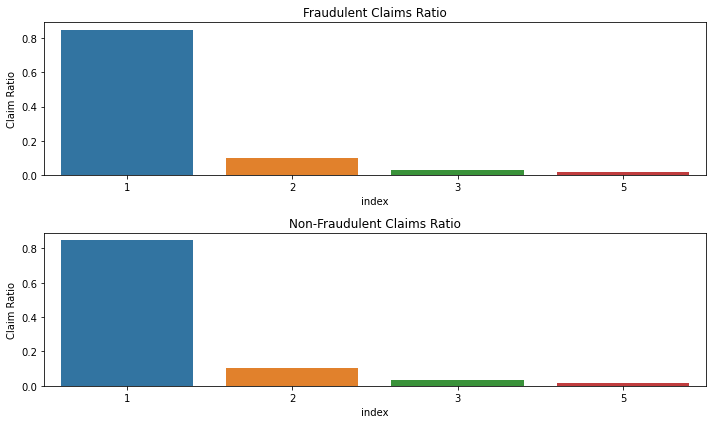

In [8]:
# 2-1-3. Race
# There is no meaningful difference of race distribution between fraudulent
# and non-fraudulent group

tmp_f = train_total.loc[train_total['PotentialFraud'] == 'Yes', 'Race'].value_counts(normalize=True)
tmp_f = tmp_f.reset_index()

tmp_nf = train_total.loc[train_total['PotentialFraud'] == 'No', 'Race'].value_counts(normalize=True)
tmp_nf = tmp_nf.reset_index()

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10,6))

ax0 = sns.barplot(data=tmp_nf, x="index", y='Race', ax=axes[0,])
ax0.set_title('Fraudulent Claims Ratio')
ax0.set_ylabel('Claim Ratio')

ax1 = sns.barplot(data=tmp_nf, x="index", y='Race', ax=axes[1,])
ax1.set_title('Non-Fraudulent Claims Ratio')
ax1.set_ylabel('Claim Ratio')

fig.tight_layout()

In [9]:
# 2-1-4. Chronic diseases
# There is no certain disease that distinctly occurs more in 
# either fraudulent or non-fraudulent group 

for disease in chronic_disease_columns:
    print('columns name : ', disease)
    print(train_total.loc[train_total['PotentialFraud'] == 'Yes', disease].value_counts(normalize=True)/\
train_total.loc[train_total['PotentialFraud'] == 'No', disease].value_counts(normalize=True))
    print('*' * 50)

columns name :  RenalDiseaseIndicator
0    0.997443
Y    1.010826
Name: RenalDiseaseIndicator, dtype: float64
**************************************************
columns name :  ChronicCond_Alzheimer
2    1.000102
1    0.999843
Name: ChronicCond_Alzheimer, dtype: float64
**************************************************
columns name :  ChronicCond_Heartfailure
1    0.999972
2    1.000039
Name: ChronicCond_Heartfailure, dtype: float64
**************************************************
columns name :  ChronicCond_KidneyDisease
2    0.992796
1    1.011007
Name: ChronicCond_KidneyDisease, dtype: float64
**************************************************
columns name :  ChronicCond_Cancer
2    0.999956
1    1.000251
Name: ChronicCond_Cancer, dtype: float64
**************************************************
columns name :  ChronicCond_ObstrPulmonary
2    0.999395
1    1.001414
Name: ChronicCond_ObstrPulmonary, dtype: float64
**************************************************
columns name :  

In [10]:
# 2-1-5. Insurance related payment amount
# There is no significant difference between the amounts that were paid to 
# fraudulent and non-fraudulent cases

for amount in amount_columns:
    print('column name : ', amount)
    print(train_total.loc[train_total['PotentialFraud'] == 'Yes', amount].describe()/\
train_total.loc[train_total['PotentialFraud'] == 'No', amount].describe())
    print('*' * 50)

column name :  InscClaimAmtReimbursed
count    0.576818
mean     1.004734
std      1.215182
min           NaN
25%      1.000000
50%      1.000000
75%      1.000000
max      1.210725
Name: InscClaimAmtReimbursed, dtype: float64
**************************************************
column name :  DeductibleAmtPaid
count    0.576818
mean     0.997333
std      1.024393
min           NaN
25%           NaN
50%           NaN
75%           NaN
max      1.000000
Name: DeductibleAmtPaid, dtype: float64
**************************************************
column name :  IPAnnualReimbursementAmt
count    0.576818
mean     0.998852
std      0.997095
min      0.062500
25%           NaN
50%           NaN
75%      1.000000
max      1.037725
Name: IPAnnualReimbursementAmt, dtype: float64
**************************************************
column name :  IPAnnualDeductibleAmt
count    0.576818
mean     1.001382
std      1.014382
min           NaN
25%           NaN
50%           NaN
75%      1.000000
max      

#### 3. Geographical distribition on fraudulent vs non fraudulent

In [17]:
# making dataframes for visualization

state_df = pd.DataFrame(train_total.groupby(by=['state_id_ansi', 'state_code'])['ClaimID'].count().sort_values(ascending=False))
state_df = state_df.reset_index()
state_df.rename(columns = {'state_id_ansi':'id'}, inplace = True)
# each state's ratio from total claims
state_df['ClaimID_Ratio'] = state_df['ClaimID'] / state_df['ClaimID'].sum()

state_df_fraud = train_total[train_total['PotentialFraud'] == 'Yes'].groupby(by=['state_id_ansi', 'state_code'])['ClaimID'].count().sort_values(ascending=False)
state_df_fraud = pd.DataFrame(state_df_fraud).reset_index()
state_df_fraud.rename(columns = {'state_id_ansi':'id'}, inplace = True)
# each state's ratio from fraudulent claims
state_df_fraud['ClaimID_Ratio'] = state_df_fraud['ClaimID'] / state_df_fraud['ClaimID'].sum()

state_df_nonfraud = train_total[train_total['PotentialFraud'] == 'No'].groupby(by=['state_id_ansi', 'state_code'])['ClaimID'].count().sort_values(ascending=False)
state_df_nonfraud = pd.DataFrame(state_df_nonfraud).reset_index()
state_df_nonfraud.rename(columns = {'state_id_ansi':'id'}, inplace = True)
# each state's ratio from non-fraudulent claims
state_df_nonfraud['ClaimID_Ratio'] = state_df_nonfraud['ClaimID'] / state_df_nonfraud['ClaimID'].sum()

##### 3-1. bar chart visualization

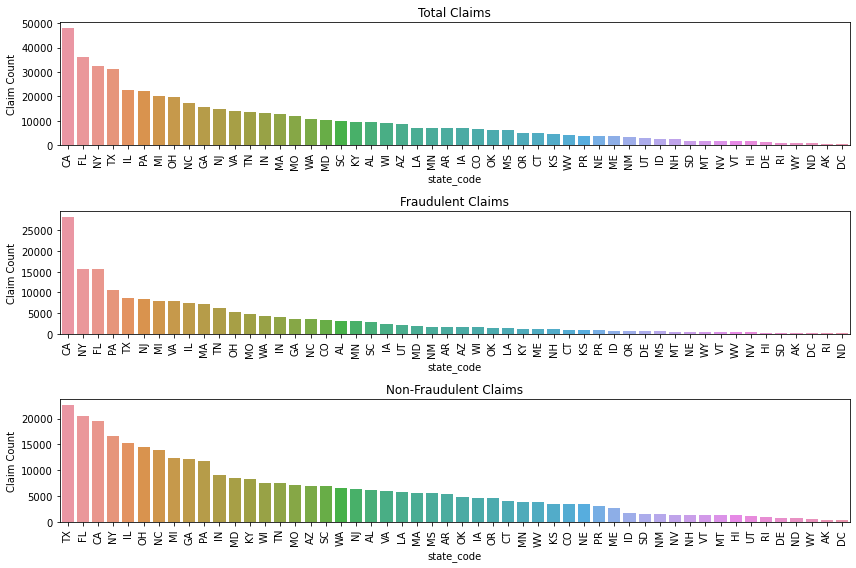

In [18]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(12,8))

ax0 = sns.barplot(data=state_df, x="state_code", y="ClaimID", ax=axes[0,])
ax0.set_xticklabels(ax0.get_xticklabels(),rotation=90)
ax0.set_title('Total Claims')
ax0.set_ylabel('Claim Count')

ax1 = sns.barplot(data=state_df_fraud, x="state_code", y="ClaimID", ax=axes[1,])
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90)
ax1.set_title('Fraudulent Claims')
ax1.set_ylabel('Claim Count')

ax2 = sns.barplot(data=state_df_nonfraud, x="state_code", y="ClaimID", ax=axes[2,])
ax2.set_xticklabels(ax2.get_xticklabels(),rotation=90)
ax2.set_title('Non-Fraudulent Claims')
ax2.set_ylabel('Claim Count')

fig.tight_layout()

#### 3-2. geo-visualization of fraudulent cases

In [19]:
# creating a new dataframe for geo-visualization
fraud_state_df = (state_df_fraud.set_index('state_code') - state_df_nonfraud.set_index('state_code'))\
.dropna(axis=0).sort_values(by='ClaimID_Ratio', ascending=False)
fraud_state_df = fraud_state_df.drop('id', 1)

fraud_state_df = fraud_state_df.reset_index()
fraud_state_df = pd.merge(fraud_state_df, state_number, how = 'left', on='state_code')
fraud_state_df = fraud_state_df.rename(columns={'state_id_ansi': 'id'})

# geo distribution of fraudulent ratio - non fraudulent ratio

states = alt.topo_feature(data.us_10m.url, feature='states')
base = alt.Chart(states).mark_geoshape(fill='transparent', stroke='black', strokeWidth=0.5)

chart = alt.Chart(states).mark_geoshape(stroke='black').encode(
    color = 'ClaimID_Ratio:Q',
    tooltip = ['state_code:O', 'ClaimID_Ratio:Q'] # adding tooltip for interactive
).transform_lookup(
    lookup='id',
    from_=alt.LookupData(fraud_state_df, 'id', list(fraud_state_df.columns))
).properties(
    width=500,
    height=300
).project('albersUsa')

base + chart

alt.LayerChart(...)

#### Visual distribution between Amount vs Time(Age, claimperiod)

In [ ]:
# In contrast to the inpatient data, outpatient data is about 4 times large. 
# so when conducting pandas melt method, the dataframe is about 6 million row, which is too bid for altair visualization to process

# so in order for faster visualization, the dataframe is reduced to include only selected columns.
# if wished to show different columns, the included columns can be adjusted accordingly.

In [30]:
#### Creating dataframe

##### original columns #########
amount_columns = ['InscClaimAmtReimbursed', 'DeductibleAmtPaid', 'IPAnnualReimbursementAmt', 'IPAnnualDeductibleAmt',
       'OPAnnualReimbursementAmt', 'OPAnnualDeductibleAmt' ]
time_columns = ['Age', 'ClaimPeriod']


##### selected columns ######### --> select only two

amount_columns_selected = ['InscClaimAmtReimbursed'] # select only one to avoid crashing
time_columns_selected = ['Age', 'ClaimPeriod']

############################


tmp_list_1 = amount_columns_selected + time_columns_selected
tmp_list_1.append('PotentialFraud')
tmp_df = train_total[tmp_list_1]


df_melt_first = tmp_df.melt(['Age','ClaimPeriod', 'PotentialFraud'],
                            var_name = 'amount_category', value_name = 'amount')

df_melt = df_melt_first.melt(['amount_category', 'amount', 'PotentialFraud'],
            var_name = 'time_category', value_name = 'time_value')


In [32]:
# Visualization

widget_amount = alt.binding_select(options = amount_columns_selected, name = "Amount: ") 
selectionAmount = alt.selection_single(fields = ['amount_category'], 
                                        init = {"amount_category": amount_columns_selected[0]}, 
                                        bind = widget_amount) 

widget_time = alt.binding_select(options = time_columns_selected, name = "Time Value: ") 
selectionTime = alt.selection_single(fields = ['time_category'], 
                                        init = {"time_category": time_columns_selected[0]}, 
                                        bind = widget_time) 

result = alt.Chart(df_melt).mark_circle(size=10).encode(
    x = alt.X('time_value:Q'),
    y = alt.Y('amount:Q'),
    color = alt.Color('PotentialFraud:N')
)

result.add_selection(selectionTime).transform_filter(selectionTime).\
add_selection(selectionAmount).transform_filter(selectionAmount).interactive()
                                         

alt.Chart(...)